# Reelle datasett

```{admonition} Læringsutbytte
:class: utbytte, dropdown
I dette temaet arbeider vi med kompetansemålet:
 * planlegge og gjennomføre et selvstendig arbeid med reelle datasett knyttet til naturvitenskapelige temaer og forhold, og analysere og presentere funn
 * anvende derivasjon til å analysere og tolke egne matematiske modeller av reelle datasett
 * modellere og analysere eksponentiell og logistisk vekst i reelle datasett

Etter å ha arbeidet med temaet, skal du:
 * hente inn og rydde i datasett ved hjelp av biblioteket pandas
 * anvende kunnskap om funksjoner og derivasjon til å velge egnet modell for datasettet
 * visualisere (plotte) datasettet på en oversiktlig måte
 * analysere og tolke datasettet ved hjelp av blant annet derivasjon
```

Det moderne samfunnet er bygd opp av data. De fleste beslutninger rundt oss blir tatt med utgangspunkt i innsamling av store mengder data. Når du åpner Youtube, så får du opp informasjon tilpasset deg. Den informasjonen baserer seg på datainnsamling av hva du ser på og hva andre som ser på det samme har sett på. Moderne biler samler kontinuerlig data for å analysere trafikksituasjonen og hjelpe sjårføren med riktige beslutninger. Framover vil vi i enda større grad se at prosesser styres av kunstig intelligens. Alt dette handler i bunn og grunn om store datamengder som analyseres gjennom derivasjon og statiske behandlinger. Noe av det skal vi se på her.

## Laste inn datasett
Det første vi må lære oss er hvordan vi kan laste inn datasett i programmene våre. Filene vi henter inn er rene tekstfiler uten noen form for formattering (farger, tekststørrelse osv.). Det kalles råtekstformat. Grunnen til at vi ønsker å bruke slike filer er at de er lettere å lese og færre distraherende faktorer å forholde seg til. Slike filer vil ofte være lagret som txt-filer eller csv-filer og de er forholdsvis enkle å laste inn i Python med biblioteket *Pandas*.

Her vil vi ta utgangspunkt i eksempelet med andel internettbrukere som vi så på på siden om vekstmodeller. Under ser vi de første radene i filen. Resten av filen finner du her [internettbrukere](internettbrukere.csv).

```{code-block} text
aar, andel
0,7
1,10
2,18
3,27
4,35
5,35
```

Under er det gitt et enkelt lite program som bruker *pandas*-biblioteket til å laste inn filen før punktene plottes. Vi ser at første rad automatisk identifiseres som overskrifter og kan brukes til å hente ut ei liste med årstall og ei liste med andeler.
Da vi undersøkte datasettet med regresjon fant vi at funksjonen som paset best var $\displaystyle f(x)=\frac{92.1}{1+6.6e^{-0.28x}}$. Vi plotter denne funksjonen sammen med datapunktene.

0


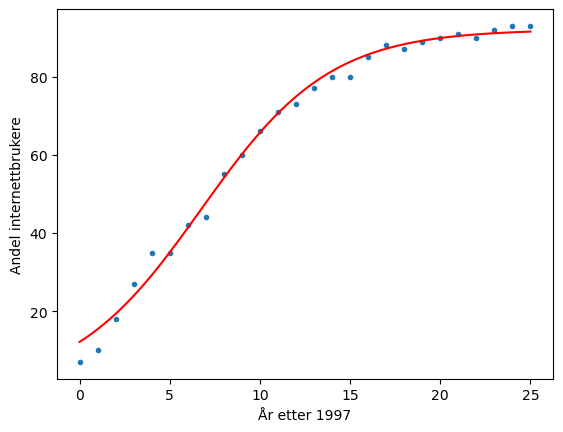

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("internettbrukere.csv", sep = ",")
aar = np.array(data["aar"])           # Henter ut lista med år
andel = np.array(data["andel"])       # Henter ut lista med andeler

print(aar[0])

def f(x):
    return 92.1 / (1+6.6*np.exp(-0.28*x))

xakse = np.linspace(aar[0], aar[-1], 1000)      # Lager 1000 x-verdier mellom første og siste år

plt.plot(aar, andel, '.')                 # Bruker scatter for å tegne kun punktene
plt.plot(xakse, f(xakse), color='r')
plt.xlabel("År etter 1997")
plt.ylabel("Andel internettbrukere")
plt.show()

Vi kan også undersøke veksten i datasettet ved å bruke numerisk derivasjon. Fra siden om numerisk derivasjon husker vi at vi kunne tilnærme den deriverte ved

$$f'(x)\approx\frac{f(x+\Delta x)-f(x)}{\Delta x}$$

der $\Delta x$ var et lite tall.

Her gjør vi det både med å bruke funksjonsuttrykket og med å bruke datasettet direkte. Når vi bruker datasettet beregner vi gjennomsnittlige vekstfart mellom andelen for de ulike årene. Dette vil gi en tilnærming til den deriverte. Det vi må gjøre er altså å regne ut endringen i andel mellom to år og så dividere dette på antall år

$$\frac{\text{andel år i+1}-\text{andel år i}}{i+1-i}$$

Nevneren blir i dette tilfellet bare 1. Vi implementerer framgangsmåten med ei løkke og tegner grafen til den deriverte med begge framgangsmåtene. Det siste året er det ikke mulig å regne ut en tilnærming for den deriverte i siden vi da hadde trengt data for året etter. Når vi tegner grafen må vi ta hensyn til det ved å bruke [:-1] bak lista. Det betyr at vi skal ta med alle utenom den siste verdien.

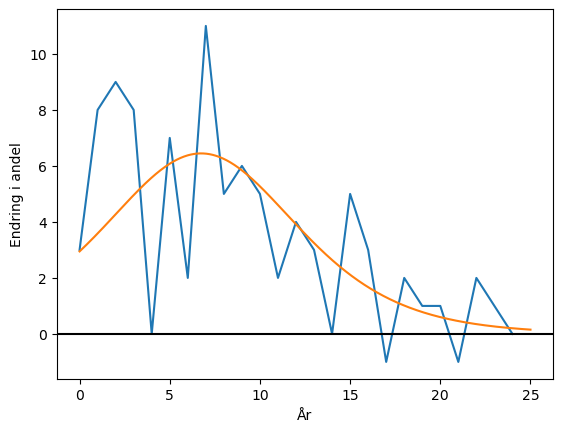

In [38]:
derivert_data = []             # Lager ei tom liste å lagre de deriverte i

def derivert(f, x, dx = 1E-8):          # Numerisk derivert av f. Her har dx fått en standardverdi
    return (f(x + dx) - f(x))/dx

derivert_numerisk = derivert(f, xakse)

for i in range(len(aar)-1):
    der_data = andel[i+1]-andel[i]      # Her skulle vi egentlig delt på (i+1-i), men det blir bare 1
    derivert_data.append(der_data)

    

plt.plot(aar[:-1], derivert_data)
plt.plot(xakse, derivert_numerisk)
plt.xlabel("År")
plt.ylabel("Endring i andel")
plt.axhline(y=0, color='black')
plt.show()


Vi ser at den blå grafen som viser gjennomsnittlig vekstfart år for år blir veldig hakkete. Det er fordi vi har få datapunkter med ganske stor avstand (et helt år). Den viser oss imidlertid en del viktig informasjon. Blant annet får den fram at med unntak av et par år rundt år 17 og 21, så er veksten positiv. Det vil si at det jevnt over er en stigning i andelen internettbrukere. Vi ser også at med unntak av enkeltår, så er trenden at veksten er størst i starten og så går veksten nedover mot null. Denne trenden ser vi bedre av den oransje kurva som viser den numerisk deriverte av den logistiske funksjonen. Denne mister imidlertid enkeltinformasjonen som at det er et par år med negativ vekst.

## Eksempel med sprettball
Vi ser på målinger av en sprettball som slippes fra 5 meters høyde i vakuum. Datasettet finner vi [her](sprettball.csv).

In [43]:
import pandas as pd

data = pd.read_csv("sprettball.csv", sep = ",")

# Skriver ut øverste del av datasettet for å få litt oversikt. 
# Her må du vanligvis skrive print(data.head()) for å få det ut, men i en jupyter notebook som disse sidene
# baserer seg på, så er ikke det nødvendig
data.head()

,tid,hoyde
0,0.00,5.000000
1,0.01,4.999019
2,0.02,4.997057
3,0.03,4.994114
4,0.04,4.990190


Vi ser at vi har en oversikt over tidspunkt og høyder. Det første vi vil gjøre er å plotte dataene for å få en oversikt.

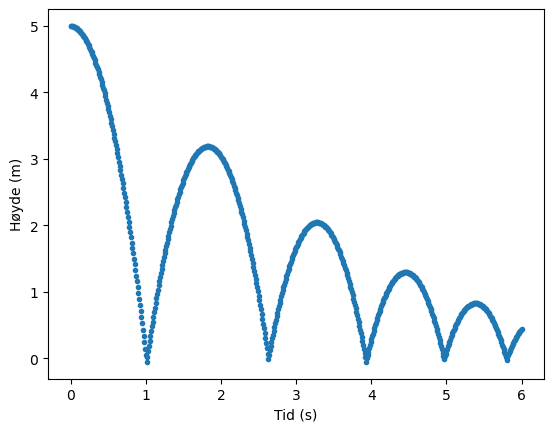

In [44]:
tid = np.array(data["tid"])
hoyde = np.array(data["hoyde"])

plt.plot(tid, hoyde, '.')
plt.xlabel("Tid (s)")
plt.ylabel("Høyde (m)")
plt.show()


Her er det ikke lett å se for seg noe funksjnsuttrykk som kan beskrive bevegelsen. Vi går derfor videre med å undersøke farten. Vi bruker da at fart er den deriverte av posisjonen som i dette tilfellet er høyden. Vi har ikke tilgang på noen funksjon for høyden, så vi finner gjennomsnittlig fart i hvert intervall og plotter denne.

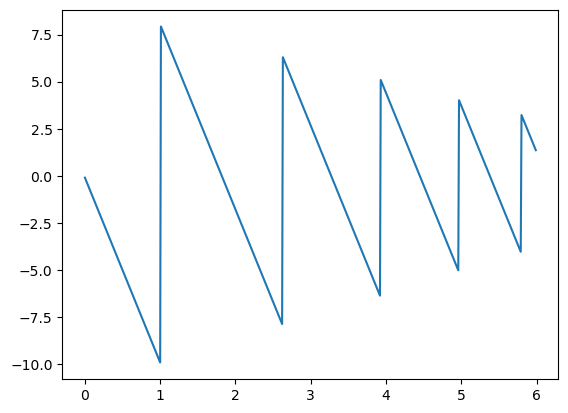

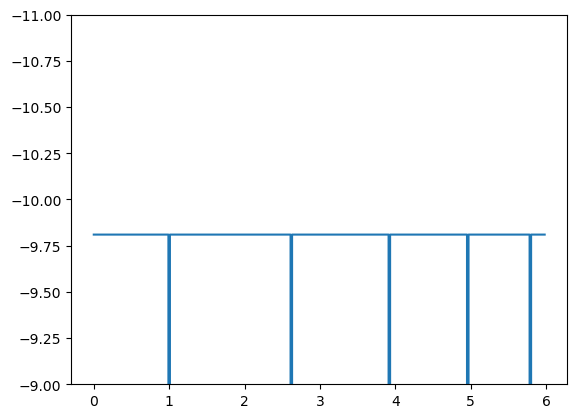

In [49]:
n = len(tid)
v = np.zeros(n-1)

for i in range(n-1):
    v[i] = (hoyde[i+1]-hoyde[i]) / (tid[i+1]-tid[i])

plt.plot(tid[:-1], v)
plt.show()

Så ser vi på akselerasjonen på samme måte, men tar da utgangspunkt i farten. Siden ballen får en voldsom og plutselig akselerasjon akkurat i det den treffer bakken har vi vagt å innskrenke $y$-aksen mellom -9 og -11 slik at vi får tydelig fram akselerasjonen i selve falløyeblikket. Lista med gjennomsnittlige akselerasjoner blir et hakk kortere enn lista med hastigheter (av samme grunn som at lista med hastigheter ble et hakk kortere enn lista med posisjoner). Lista blir derfor $n-2$ lang.

In [ ]:
a = np.zeros(n-2)           # n er fortsatt lengden på lista med tider

for i in range(n-2):
    a[i] = (v[i+1]-v[i]) / (tid[i+1]-tid[i])

plt.plot(tid[:-2], a)
plt.ylim(-9, -11)
plt.show()

## Eksempel - temperatur
En kopp med kokende vann settes i et rom med temperatur på $T_0=20^{\circ}$ C. Vi gjør målinger av temperaturen hvert halvminutt fram til temperaturen stabiliserer seg rundt romteperatur. Målingene finner vi i filen [temperatur.csv](sprettball.csv). Vi starter med å tegne inn målingene i et diagram. I tillegg bruker vi målepunktene for å tegne inn den gjennomsnittlige vekstfarten i hvert punkt.


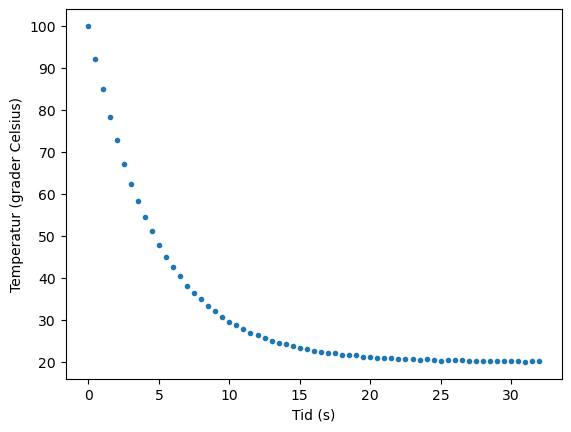

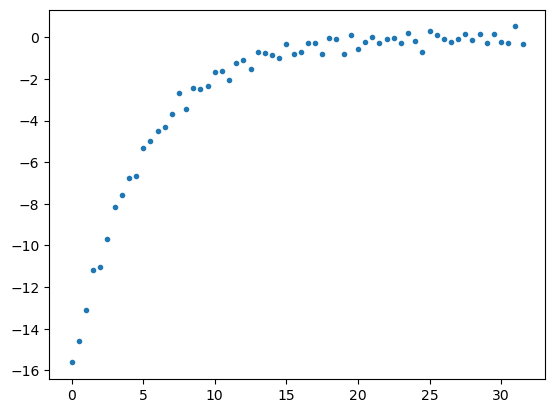

In [57]:
import pandas as pd

data = pd.read_csv("temperatur.csv", sep = ",")

# Skriver ut øverste del av datasettet for å få litt oversikt. 
# Her må du vanligvis skrive print(data.head()) for å få det ut, men i en jupyter notebook som disse sidene
# baserer seg på, så er ikke det nødvendig
data.head()

tid = np.array(data["tid"])
temperatur = np.array(data["temperatur"])

plt.plot(tid, hoyde, '.')
plt.xlabel("Tid (s)")
plt.ylabel("Temperatur (grader Celsius)")
plt.show()

n = len(tid)
dT = np.zeros(n-1)

for i in range(n-1):
    dT[i] = (temperatur[i+1]-temperatur[i]) / (tid[i+1]-tid[i])

plt.plot(tid[:-1], dT, '.')
plt.show()


I fysikk har vi en sammenheng som kalles Newtons avkjølingslov. Den gir temperaturen $T(t)$ til et objekt ved tiden $t$ når den står i omvgivelser med temperaturen $T_0$. 

$$T'(t)=-k(T(t)-T_0)$$

Det vil si at endringen i temperatur er proporsjonal med forskjellen mellom temperaturen og temperaturen til omgivelsene. Konstanten $k$ sier noe om hvor mange grader temperaturen synker hvert minutt. Vi skal her undersøke denne temperaturutviklingen og finne en passende funksjon. 